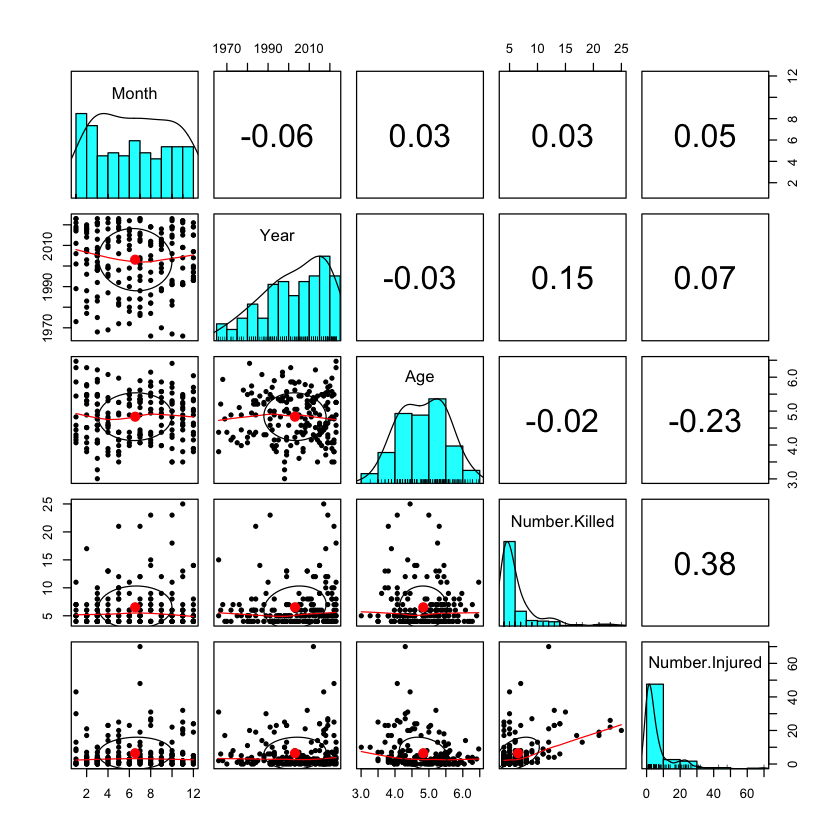

In [1]:
shooting.trans <- read.csv('/Users/alessia/Desktop/shooting/shooting.trans.csv')

shooting.l <- shooting.trans[, c('Month', 'Year', 'Age', 'Number.Killed', 'Number.Injured')]
library(psych)
pairs.panels(shooting.l, smooth = TRUE, density = TRUE, ellipses = TRUE, method = 'spearman', cor = TRUE, alpha = 0.01)
# the variables do not show strong correlations, therefore, we exclude multicollinearity
# in predicting the severity of the mass shooting, however, we avoid using Number.Injured, since it is a posterior information

In [2]:
# create dummy variables for Location and Race
library(fastDummies)
shooting.trans <- dummy_cols(shooting.trans, 
                   select_columns = "Race")
shooting.trans <- dummy_cols(shooting.trans,
                             select_columns = 'Location')
# remove original columns
shooting.trans <- shooting.trans[,-c(1, 7, 14, 51, 40)]

Thank you for using fastDummies!

To acknowledge our work, please cite the package:

Kaplan, J. & Schlegel, B. (2023). fastDummies: Fast Creation of Dummy (Binary) Columns and Rows from Categorical Variables. Version 1.7.1. URL: https://github.com/jacobkap/fastDummies, https://jacobkap.github.io/fastDummies/.



In [3]:
# we first yield inferences on the data. Alternative hypotheses are:
# - mass shootings in which leakage was present tend to be more severe
# - mass shootings in which the shooter treats the act as a performance tend to be more severe
# - mass shootings in which the shooter is looking for fame tend to be more severe
wilcox.test(shooting.trans$Number.Killed[shooting.trans$Leakage. > 1], shooting.trans$Number.Killed[shooting.trans$Leakage. == 1])
# the Wilcoxon test suggests that there is enough evidence to reject the null-hypothesis in the first case
wilcox.test(shooting.trans$Number.Killed[shooting.trans$Performance > 1], shooting.trans$Number.Killed[shooting.trans$Performance == 1])
# the same is true in the second case
wilcox.test(shooting.trans$Number.Killed[shooting.trans$Motive..Fame.Seeking > 1], shooting.trans$Number.Killed[shooting.trans$Motive..Fame.Seeking == 1])
# and for the last hypothesis

# indeed, the findings are consistent with the initial hypotheses
# we expect the three previously tested variables to yield a significant p-value in a regression setting


	Wilcoxon rank sum test with continuity correction

data:  shooting.trans$Number.Killed[shooting.trans$Leakage. > 1] and shooting.trans$Number.Killed[shooting.trans$Leakage. == 1]
W = 5720.5, p-value = 0.00369
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test with continuity correction

data:  shooting.trans$Number.Killed[shooting.trans$Performance > 1] and shooting.trans$Number.Killed[shooting.trans$Performance == 1]
W = 2460.5, p-value = 0.0003302
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test with continuity correction

data:  shooting.trans$Number.Killed[shooting.trans$Motive..Fame.Seeking > 1] and shooting.trans$Number.Killed[shooting.trans$Motive..Fame.Seeking == 1]
W = 1674, p-value = 0.03165
alternative hypothesis: true location shift is not equal to 0


In [4]:
# Regression
# split data into training and validation set
library(caret)
set.seed(42)
split_index <- createDataPartition(shooting.trans$Number.Killed, p = 0.75, list = F)
training_data <- shooting.trans[split_index, ]
validation_data <- shooting.trans[-split_index, ]

Caricamento del pacchetto richiesto: ggplot2


Caricamento pacchetto: ‘ggplot2’


I seguenti oggetti sono mascherati da ‘package:psych’:

    %+%, alpha


Caricamento del pacchetto richiesto: lattice



In [5]:
# fit model on all predictors considered except Number.Injured
training_data <- training_data[, -c(10)]
model.lm <- lm(Number.Killed ~ ., data = training_data)
summary(model.lm)
# from the F-test we cannot conclude that at least one of the predictors is significant
# therefore, using all variables doesn't really help in predicting the severity of the mass shooting


Call:
lm(formula = Number.Killed ~ ., data = training_data)

Residuals:
   Min     1Q Median     3Q    Max 
-6.263 -1.049  0.000  1.045  9.001 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)   
(Intercept)                         -85.97018   57.64637  -1.491  0.14139   
Day.of.WeekMonday                    -1.60161    1.52335  -1.051  0.29752   
Day.of.WeekSaturday                  -1.81368    1.58301  -1.146  0.25670   
Day.of.WeekSunday                    -1.91719    1.59096  -1.205  0.23316   
Day.of.WeekThursday                  -2.34874    1.44128  -1.630  0.10870   
Day.of.WeekTuesday                   -1.16369    1.55721  -0.747  0.45796   
Day.of.WeekWednesday                 -2.54223    1.52921  -1.662  0.10191   
Month                                 0.17071    0.13068   1.306  0.19668   
Year                                  0.04297    0.02902   1.481  0.14425   
StateAR                              -6.28835    5.08778  -1.236  0.22

In [6]:
anova(model.lm)
# according to ANOVA, the variables which are most significant in explaining the sum of squares are:
# Year, Bullied, Motive..Fame.Seeking, Leakage., Relationship.with.Other.Shooting.s., Race_0 (white/Caucasian)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Day.of.Week,6,1.556942e+01,2.594903954,0.257268238,0.954301635
Month,1,1.204395e+01,12.043946909,1.194080806,0.279104923
Year,1,7.959144e+01,79.591438162,7.890985348,0.006794022
State,37,5.136528e+02,13.882507415,1.376362397,0.136690141
Urban.Suburban.Rural,1,2.299836e+00,2.299835854,0.228014111,0.634826269
Insider.or.Outsider,1,4.283950e+00,4.283950178,0.424726439,0.517207254
Multiple.Locations,1,5.937209e+00,5.937208724,0.588636518,0.446113272
Armed.Person.on.Scene,1,1.344039e+00,1.344039195,0.133252946,0.716433831
Gender,1,2.813494e+00,2.813494050,0.278940057,0.599447057


In [7]:
# we try refitting the model with just variables that are deemed significant through the p-value
model2.lm <- lm(Number.Killed ~ Year + Relationship.with.Other.Shooting.s. + Leakage. + Bullied + Motive..Fame.Seeking + Race_0, data = training_data)
summary(model2.lm)
# in this case, the sum of squares due to regression is significant


Call:
lm(formula = Number.Killed ~ Year + Relationship.with.Other.Shooting.s. + 
    Leakage. + Bullied + Motive..Fame.Seeking + Race_0, data = training_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.2983 -1.5957 -0.5309  1.0384 15.0267 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)   
(Intercept)                         -97.82910   37.62899  -2.600  0.01033 * 
Year                                  0.04996    0.01889   2.644  0.00913 **
Relationship.with.Other.Shooting.s.   2.27409    0.95835   2.373  0.01902 * 
Leakage.                              1.04971    0.56908   1.845  0.06723 . 
Bullied                               2.57529    0.77809   3.310  0.00119 **
Motive..Fame.Seeking                  1.37823    1.17055   1.177  0.24104   
Race_0                                0.98712    0.56197   1.757  0.08120 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.244 on 139 degrees o

In [8]:
# multicollinearity diagnostics
cov2cor(vcov(model2.lm))
# there are no large absolute values
# variance inflation factor (VIF)
Xsl <- model.matrix(model2.lm)[, -1]
vif <- diag(solve(cor(Xsl)))
vif
max(vif)
mean(vif)
# the model doesn't suffer from multicollinearity

,(Intercept),Year,Relationship.with.Other.Shooting.s.,Leakage.,Bullied,Motive..Fame.Seeking,Race_0
(Intercept),1.00000000,-0.99934256,-0.111085863,0.1137244,-0.055209258,0.14462876,-0.17896796
Year,-0.99934256,1.00000000,0.121602954,-0.1283880,0.052015575,-0.17276910,0.17492271
Relationship.with.Other.Shooting.s.,-0.11108586,0.12160295,1.000000000,-0.1043490,0.006337597,-0.34474549,-0.01949322
Leakage.,0.11372443,-0.12838796,-0.104348998,1.0000000,-0.111020968,-0.12794023,-0.16676965
Bullied,-0.05520926,0.05201558,0.006337597,-0.1110210,1.000000000,0.03079796,0.15552100
Motive..Fame.Seeking,0.14462876,-0.17276910,-0.344745489,-0.1279402,0.030797965,1.00000000,-0.05962409
Race_0,-0.17896796,0.17492271,-0.019493221,-0.1667696,0.155521000,-0.05962409,1.00000000


Year Relationship.with.Other.Shooting.s. 
                           1.082026                            1.174362 
                           Leakage.                             Bullied 
                           1.101924                            1.034147 
               Motive..Fame.Seeking                              Race_0 
                           1.212570                            1.085066

[1] 1.21257

[1] 1.115016

In [9]:
# use AIC to select variables
model.initial <- lm(Number.Killed ~ 1, data = training_data)
model.full <- lm(Number.Killed ~ ., data = training_data)
library(MASS)
model.step <- stepAIC(model.initial, list(upper = model.full, lower = model.initial), direction = 'both')
# according to stepwise AIC, the variables which help the most in predicting the severity of a mass shooting are
# Race_4 + Leakage. + Bullied + Location_3 + Relationship.with.Other.Shooting.s. + Race_1 + Year + 
# Motive..Religious.Hate + Military.Service + Motive..Interpersonal.Conflict. + Location_5 + Motive..Racism.Xenophobia + 
# Location_6 + Motive..Fame.Seeking

# the findings are consistent with the initial hypotheses, except for the variable Performance

Start:  AIC=375.42
Number.Killed ~ 1

                                      Df Sum of Sq    RSS    AIC
+ Performance                          1    137.55 1746.7 366.36
+ Leakage.                             1    126.34 1757.9 367.29
+ Relationship.with.Other.Shooting.s.  1    115.04 1769.2 368.23
+ Interest.in.Past.Mass.Violence       1    108.84 1775.5 368.74
+ Race_4                               1    108.68 1775.6 368.75
+ Bullied                              1    103.27 1781.0 369.19
+ Motive..Fame.Seeking                 1     98.12 1786.2 369.62
+ Planning                             1     83.62 1800.7 370.80
+ Race_1                               1     80.45 1803.8 371.05
+ Year                                 1     76.39 1807.9 371.38
+ Location_0                           1     63.93 1820.3 372.38
+ Location_3                           1     52.83 1831.5 373.27
+ Location_5                           1     36.98 1847.3 374.53
+ Location_8                           1     27.05 1

In [10]:
model3.lm <- lm(Number.Killed ~ Race_4 + Leakage. + Bullied + Location_3 + Relationship.with.Other.Shooting.s. + Race_1 + Year + 
                   Motive..Religious.Hate + Military.Service + Motive..Interpersonal.Conflict. + Location_5 + Motive..Racism.Xenophobia + 
                   Location_6 + Motive..Fame.Seeking, data = training_data)

summary(model3.lm)
# this model contributes to explaining the sum of squares


Call:
lm(formula = Number.Killed ~ Race_4 + Leakage. + Bullied + Location_3 + 
    Relationship.with.Other.Shooting.s. + Race_1 + Year + Motive..Religious.Hate + 
    Military.Service + Motive..Interpersonal.Conflict. + Location_5 + 
    Motive..Racism.Xenophobia + Location_6 + Motive..Fame.Seeking, 
    data = training_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.8950 -1.6717 -0.4634  1.1012 12.8695 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)   
(Intercept)                         -80.95544   34.87268  -2.321  0.02181 * 
Race_4                                4.62087    1.81692   2.543  0.01215 * 
Leakage.                              1.00339    0.52507   1.911  0.05819 . 
Bullied                               1.85532    0.72728   2.551  0.01189 * 
Location_3                            4.25961    1.39029   3.064  0.00265 **
Relationship.with.Other.Shooting.s.   2.90334    0.89536   3.243  0.00150 **
Race_1                 

In [11]:
# we fit a final model with the predictors which are yielded significant by this model
model4.lm <- lm(Number.Killed ~ Race_4 + Leakage. + Bullied + Location_3 + Relationship.with.Other.Shooting.s. + Race_1 + Year + 
                  Motive..Religious.Hate + Military.Service + Motive..Racism.Xenophobia, data = training_data)
summary(model4.lm)


Call:
lm(formula = Number.Killed ~ Race_4 + Leakage. + Bullied + Location_3 + 
    Relationship.with.Other.Shooting.s. + Race_1 + Year + Motive..Religious.Hate + 
    Military.Service + Motive..Racism.Xenophobia, data = training_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9745 -1.6286 -0.3236  0.9017 13.1076 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         -82.71073   34.95493  -2.366 0.019393 *  
Race_4                                4.90447    1.83727   2.669 0.008530 ** 
Leakage.                              1.16300    0.52624   2.210 0.028789 *  
Bullied                               1.72320    0.74123   2.325 0.021575 *  
Location_3                            4.01684    1.38606   2.898 0.004384 ** 
Relationship.with.Other.Shooting.s.   3.23799    0.85118   3.804 0.000215 ***
Race_1                               -1.58117    0.61476  -2.572 0.011193 *  
Year                           

In [12]:
# evaluation of the models

# we exclude the model with all predictors and only evaluate the other 3 models
# model 2
R2 <- summary(model2.lm)$r.squared # R2 on training data
cat("R^2:", R2, "\n")
adjR2 <- summary(model2.lm)$adj.r.squared # adj R2 on training data
cat("Adjusted R^2:", adjR2, "\n")
ntr <- nrow(model.matrix(model2.lm))
rmse <- sqrt(deviance(model2.lm)/ntr) # RMSE training data
cat("RMSE on training data:", rmse, "\n")
pred.final <- predict(model2.lm, newdata = validation_data)
rmsep <- RMSE(validation_data$Number.Killed, pred.final) # RMSEP on validation data
cat("RMSE on validation data:", rmsep, "\n")
pred.final <- predict(model2.lm, newdata = shooting.trans)
rmset <- RMSE(shooting.trans$Number.Killed, pred.final) # RMSE on whole dataset
cat("RMSE on whole dataset:", rmset, "\n")

R^2: 0.223525 
Adjusted R^2: 0.1900081 
RMSE on training data: 3.16563 
RMSE on validation data: 4.275622 
RMSE on whole dataset: 3.468811 


In [13]:
# model 3
R2 <- summary(model3.lm)$r.squared # R2 on training data
cat('R^2:', R2, '\n')
adjR2 <- summary(model3.lm)$adj.r.squared # adj R2 on training data
cat("Adjusted R^2:", adjR2, "\n")
ntr <- nrow(model.matrix(model3.lm))
rmse <- sqrt(deviance(model3.lm)/ntr) # RMSE training data
cat("RMSE on training data:", rmse, "\n")
pred.final <- predict(model3.lm, newdata = validation_data)
rmsep <- RMSE(validation_data$Number.Killed, pred.final) # RMSEP on validation data
cat("RMSE on validation data:", rmsep, "\n")
pred.final <- predict(model3.lm, newdata = shooting.trans)
rmset <- RMSE(shooting.trans$Number.Killed, pred.final) # RMSE on whole dataset
cat("RMSE on whole dataset:", rmset, "\n")

R^2: 0.3920257 
Adjusted R^2: 0.3270514 
RMSE on training data: 2.801167 
RMSE on validation data: 4.783522 
RMSE on whole dataset: 3.392351 


In [14]:
# model 4
R2 <- summary(model4.lm)$r.squared # R2 on training data
cat('R^2:', R2, '\n')
adjR2 <- summary(model4.lm)$adj.r.squared # adj R2 on training data
cat("Adjusted R^2:", adjR2, "\n")
ntr <- nrow(model.matrix(model4.lm))
rmse <- sqrt(deviance(model4.lm)/ntr) # RMSE training data
cat("RMSE on training data:", rmse, "\n")
pred.final <- predict(model4.lm, newdata = validation_data)
rmsep <- RMSE(validation_data$Number.Killed, pred.final) # RMSEP on validation data
cat("RMSE on validation data:", rmsep, "\n")
pred.final <- predict(model4.lm, newdata = shooting.trans)
rmset <- RMSE(shooting.trans$Number.Killed, pred.final) # RMSE on whole dataset
cat("RMSE on whole dataset:", rmset, "\n")

R^2: 0.3462138 
Adjusted R^2: 0.2977852 
RMSE on training data: 2.904787 
RMSE on validation data: 4.571882 
RMSE on whole dataset: 3.387202 


Overall, model 4 is preferrable to the others.

We now consider other regression models.

In [15]:
# decision trees

# we don't transform Age in this case:
shooting.save <- read.csv('/Users/alessia/Desktop/shooting/shooting.save.csv')

In [16]:
# create dummy variables
# this is necessary, otherwise this regression tree assigns more importance to variables with more levels
library(fastDummies)
shooting.save <- dummy_cols(shooting.save, 
                             select_columns = "Race")
shooting.save <- dummy_cols(shooting.save,
                             select_columns = 'Location')
shooting.save <- dummy_cols(shooting.save, select_columns = 'State')

In [17]:
# remove original columns
library(dplyr)
shooting.save <- shooting.save %>% select(-c('State', 'Location', 'Race', 'Number.Injured', 'X', 'Race_6', 'Location_10', 'Day.of.Week'))

# split training and validation data
set.seed(42)
split_index <- createDataPartition(shooting.save$Number.Killed, p = 0.75, list = F)
training_data <- shooting.save[split_index, ]
validation_data <- shooting.save[-split_index, ]


Caricamento pacchetto: ‘dplyr’


Il seguente oggetto è mascherato da ‘package:MASS’:

    select


I seguenti oggetti sono mascherati da ‘package:stats’:

    filter, lag


I seguenti oggetti sono mascherati da ‘package:base’:

    intersect, setdiff, setequal, union




In [18]:
library(caret)
tc <- trainControl(method = "cv",
                   number = 10, search = 'grid')

dt <- train(Number.Killed ~ .,
           data = training_data,
           trControl = tc,
           method = "rpart",
           tuneGrid = expand.grid(cp = 0))
dt

CART 

146 samples
 88 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 130, 132, 131, 131, 132, 131, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  3.755478  0.0415032  2.709932

Tuning parameter 'cp' was held constant at a value of 0

Aggiornamento indice HTML dei pacchetti in '.Library'

Making 'packages.html' ...
 fatto

Caricamento del pacchetto richiesto: rpart



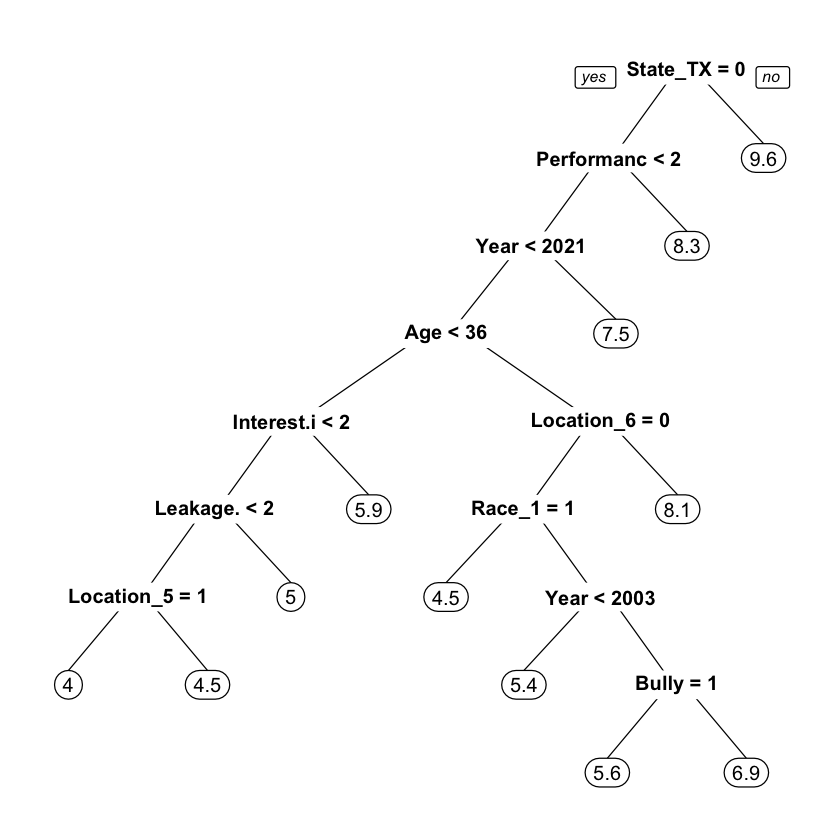

In [19]:
install.packages('rpart')
library(rpart.plot)
prp(dt$finalModel)
# by looking at the decision tree obtained through cross-validation, we can see that the most informative variables
# are the fact of being in Texas, as shootings outside of Texas tend to have more victims
# furthermore, Performance is a very informative variable: people who treat the shooting as a performance
# tend to make more victims. Hence, the model's predictors are consistent with the initial hypotheses in the project.

In [20]:
# evaluate decision tree
pred <- predict(dt$finalModel, newdata = validation_data)
rmsep <- RMSE(validation_data$Number.Killed, pred) # RMSEP on validation data
cat("RMSE on validation data:", rmsep, "\n")
pred <- predict(dt$finalModel, newdata = shooting.save)
rmset <- RMSE(shooting.save$Number.Killed, pred) # RMSE on full dataset
cat("RMSE on whole dataset:", rmset, "\n")
pred <- predict(dt$finalModel, newdata = training_data)
rmse <- RMSE(training_data$Number.Killed, pred) # RMSE on training data
cat("RMSE on training data:", rmse, "\n")

RMSE on validation data: 4.284972 
RMSE on whole dataset: 3.450607 
RMSE on training data: 3.135114 


In [21]:
# Random Forest
# random forest doesn't need to use dummy variables
install.packages('randomForest')
library(randomForest)
shooting.save <- read.csv('/Users/alessia/Desktop/shooting/shooting.save.csv')
shooting.save <- shooting.save %>% select(-c('Number.Injured', 'X', 'State', 'Day.of.Week'))

Aggiornamento indice HTML dei pacchetti in '.Library'

Making 'packages.html' ...
 fatto

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Caricamento pacchetto: ‘randomForest’


Il seguente oggetto è mascherato da ‘package:dplyr’:

    combine


Il seguente oggetto è mascherato da ‘package:ggplot2’:

    margin


Il seguente oggetto è mascherato da ‘package:psych’:

    outlier




In [22]:
set.seed(42) # split data
split_index <- createDataPartition(shooting.save$Number.Killed, p = 0.75, list = F)
training_data <- shooting.save[split_index, ]
validation_data <- shooting.save[-split_index, ]

In [23]:
# train random forest
set.seed(18)
tc <- trainControl(method = "cv", number = 10, search = 'grid')

rf <- train(Number.Killed ~ .,
            data = training_data,
            trControl = tc,
            method = "rf",
            tuneGrid = expand.grid(mtry = 2:15))
rf

Random Forest 

146 samples
 31 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 132, 132, 131, 131, 130, 132, ... 
Resampling results across tuning parameters:

  mtry  RMSE      Rsquared   MAE     
   2    3.323432  0.1951634  2.223154
   3    3.320651  0.2020758  2.224542
   4    3.322613  0.1956316  2.233426
   5    3.350696  0.1894405  2.260315
   6    3.385654  0.1819552  2.296431
   7    3.365702  0.1935279  2.276557
   8    3.364251  0.1933822  2.283310
   9    3.389313  0.1878843  2.299750
  10    3.411510  0.1790668  2.324896
  11    3.396472  0.1846120  2.314139
  12    3.413573  0.1874197  2.331827
  13    3.396306  0.1923278  2.320570
  14    3.430233  0.1793971  2.345657
  15    3.406967  0.1784016  2.304345

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was mtry = 3.

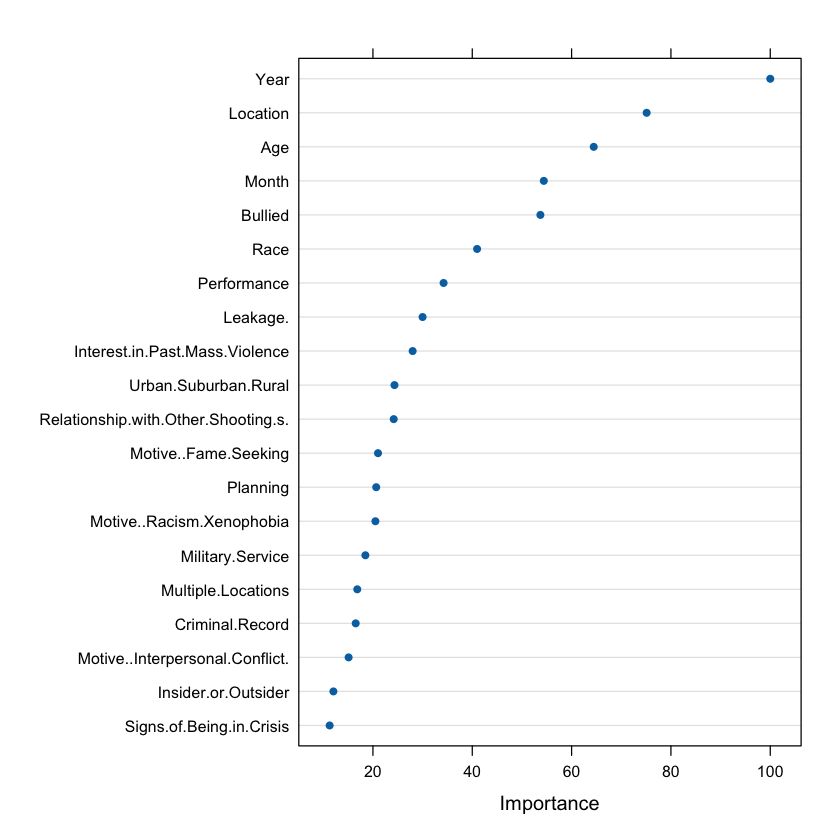

In [30]:
# variable importance
dotPlot(varImp(rf))
# by looking at variable importance, we can see that the random forest tends to select
# predictors which can assume a lot of values to split the data (first group of variables)
# by looking at the second group of variables, predictors such as 
# Bullied, Race, Performance and Leakage also show a good importance.
# The presence of the variables Performance and Leakage is consistent with the starting hypotheses in the project

In [25]:
# evaluate random forest
pred <- predict(rf$finalModel, newdata = validation_data)
rmsep <- RMSE(validation_data$Number.Killed, pred) # RMSEP on validation data
cat("RMSE on validation data:", rmsep, "\n")
pred <- predict(rf$finalModel, newdata = shooting.save)
rmset <- RMSE(shooting.save$Number.Killed, pred) # RMSE on full dataset
cat("RMSE on whole dataset:", rmset, "\n")
pred <- predict(rf$finalModel, newdata = training_data)
rmse <- RMSE(training_data$Number.Killed, pred) # RMSE on training data
cat("RMSE on training data:", rmse, "\n")

RMSE on validation data: 4.197793 
RMSE on whole dataset: 2.744311 
RMSE on training data: 2.069546 


Random Forest performs better than all other models previously tried (Linear regressions and Decision Trees).

In [26]:
# Boosted tree
install.packages('gbm')
library(gbm)
tc <- trainControl(method = "cv",
                   number = 10)

bt <- train(Number.Killed ~ .,
           data = training_data,
           trControl = tc,
           method = "gbm",
           tuneGrid = expand.grid(
             interaction.depth = 1:3,
             n.trees = seq(20, 200, 10),
             shrinkage = 0.1,
             n.minobsinnode = 10),
           verbose = FALSE)

bt

Aggiornamento indice HTML dei pacchetti in '.Library'

Making 'packages.html' ...
 fatto

Loaded gbm 2.1.9

This version of gbm is no longer under development. Consider transitioning to gbm3, https://github.com/gbm-developers/gbm3



Stochastic Gradient Boosting 

146 samples
 31 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 130, 131, 132, 131, 132, 132, ... 
Resampling results across tuning parameters:

  interaction.depth  n.trees  RMSE      Rsquared    MAE     
  1                   20      3.245580  0.12480244  2.259180
  1                   30      3.232098  0.13583421  2.253443
  1                   40      3.272573  0.13125775  2.297442
  1                   50      3.298248  0.12243009  2.302696
  1                   60      3.370490  0.10088790  2.363676
  1                   70      3.387307  0.09282439  2.393191
  1                   80      3.392293  0.09507052  2.398753
  1                   90      3.390703  0.09843180  2.415618
  1                  100      3.389885  0.10287167  2.423115
  1                  110      3.397223  0.10808559  2.411619
  1                  120      3.406454  0.10526888  2.419768
  1                  130      3.419494  0.10564

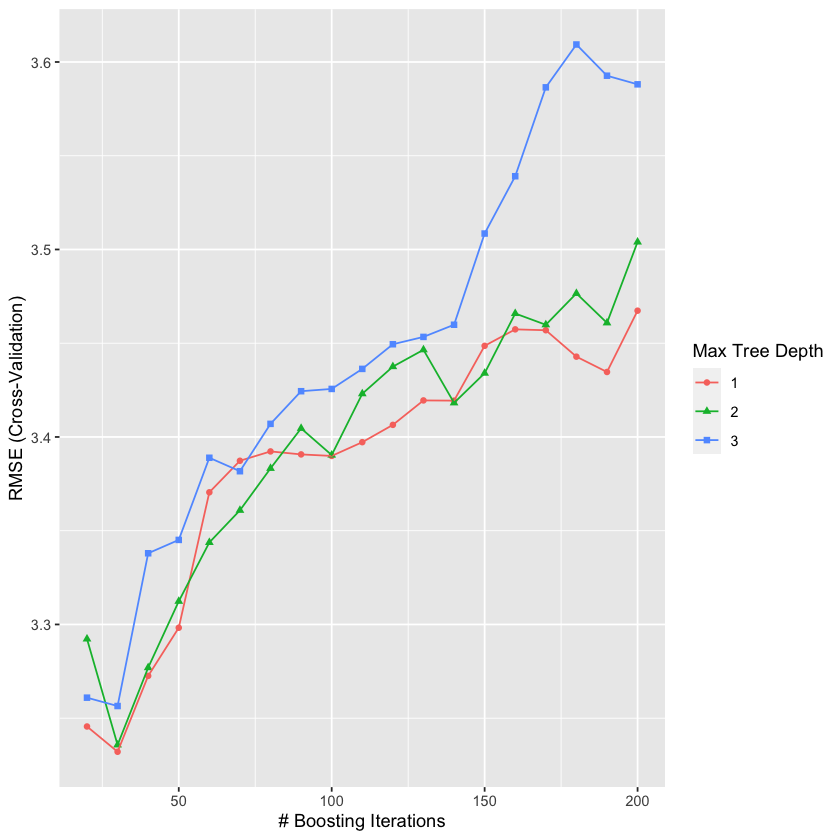

In [27]:
ggplot(bt) # plot boosting iterations vs RMSE

,var,rel.inf
,<chr>,<dbl>
Year,Year,19.063134
Age,Age,15.044927
Location,Location,14.839549
Bullied,Bullied,14.347677
Performance,Performance,7.695043
Interest.in.Past.Mass.Violence,Interest.in.Past.Mass.Violence,5.966249
Relationship.with.Other.Shooting.s.,Relationship.with.Other.Shooting.s.,4.949839
Planning,Planning,4.120386
Leakage.,Leakage.,4.065198


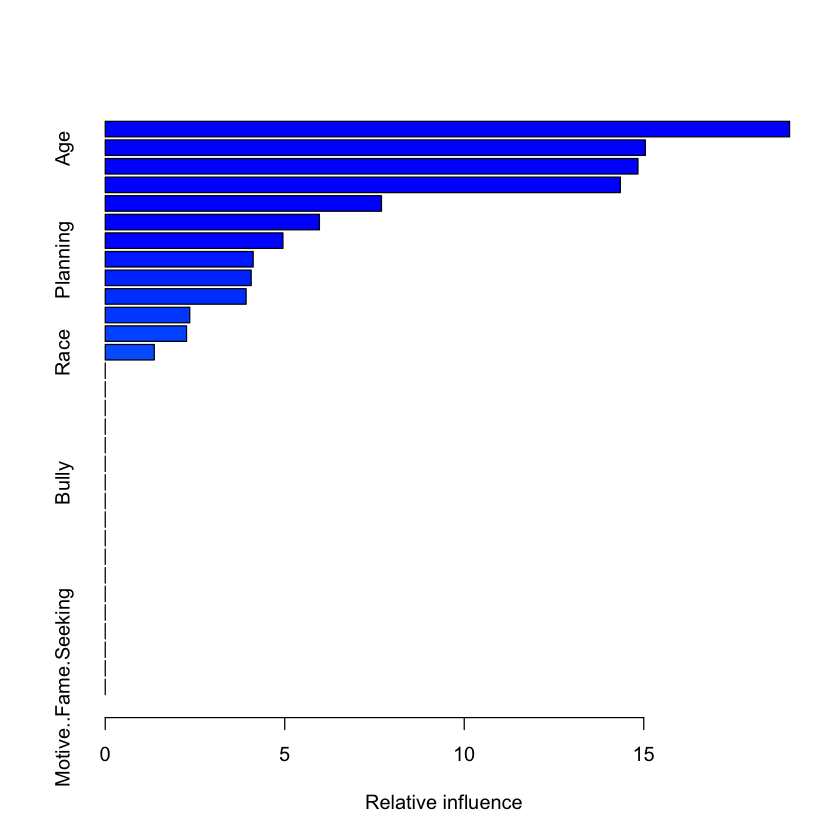

In [28]:
summary(bt) # look at variable importance

The most important predictors are once again those that can take on many different levels (Year, Age, Location). However, just next, we see that the variables Bullied, Performance, Interest.in.Past.Mass.Violence, Relationship.with.Other.Shooting.s, Planning and Leakage also influence the model.

This is partially consistent with our hypotheses (for what concerns Leakage and Performance).

In [29]:
# evaluate boosted trees
pred <- predict(bt$finalModel, newdata = validation_data)
rmsep <- RMSE(validation_data$Number.Killed, pred) # RMSEP on validation data
cat("RMSE on validation data:", rmsep, "\n")
pred <- predict(bt$finalModel, newdata = shooting.save)
rmset <- RMSE(shooting.save$Number.Killed, pred) # RMSE on full dataset
cat("RMSE on whole dataset:", rmset, "\n")
pred <- predict(bt$finalModel, newdata = training_data)
rmse <- RMSE(training_data$Number.Killed, pred) # RMSE on training data
cat("RMSE on training data:", rmse, "\n")

Using 30 trees...




RMSE on validation data: 4.520882 


Using 30 trees...




RMSE on whole dataset: 3.741554 


Using 30 trees...




RMSE on training data: 3.453454 


Overall, the best-performing model is the random forest, which highlights the importance of the variables Bullied, Race, Leakage and Relationship.with.Other.Shooting.s. The fact that the variable Leakage is included in the most informative variables in almost all models, sometimes paired with Performance and Motive..Fame.Seeking, supports the idea that these  variables should be included in models aimed to predict the severity of a mass shooting. Furthermore, this finding underlines the importance of a sociological perspective on the reasons behind mass shootings, as these events are not completely explainable and thus preventable simply by taking on a psychological approach and focusing on single individuals.